# Fuzzy Control Systems: The Tipping Problem

The *tipping problem* is commonly used to illustrate the power of fuzzy logic
principles to generate complex behavior from a compact, intuitive set of
expert rules.

## The Tipping Problem

Let's create a fuzzy control system which models how you might choose to tip
at a restaurant.  When tipping, you consider the service and food quality,
rated between 0 and 10. You use this to leave a tip of between 0 and 25%.

We would formulate this problem as:

* Antecedents (Inputs)
   - `service`
      * Universe (ie, crisp value range): How good was the service of the wait
        staff, on a scale of 0 to 10?
      * Fuzzy set (ie, fuzzy value range): poor, acceptable, amazing
   - `food quality`
      * Universe: How tasty was the food, on a scale of 0 to 10?
      * Fuzzy set: bad, decent, great
* Consequents (Outputs)
   - `tip`
      * Universe: How much should we tip, on a scale of 0% to 25%
      * Fuzzy set: low, medium, high
* Rules
   - IF the *service* was good *or* the *food quality* was good,
     THEN the tip will be high.
   - IF the *service* was average, THEN the tip will be medium.
   - IF the *service* was poor *and* the *food quality* was poor
     THEN the tip will be low.
* Usage
   - If I tell this controller that I rated:
      * the service as 9.8, and
      * the quality as 6.5,
   - it would recommend I leave:
      * a 20.2% tip.

## Creating the Tipping Controller Using the JuzzyPy API

We can use the `JuzzyPython` control system API to model this. First, let's define fuzzy variables.

In [1]:
from juzzyPython.generic.Tuple import Tuple
from juzzyPython.generic.Input import Input
from juzzyPython.generic.Output import Output

# New Antecedent/Consequent objects hold universe variables and membership functions

# Inputs to the FLS: Linguistic variables
food = Input("Food Quality",Tuple(0,10)) #Rating from 0-10
service = Input("Service Level",Tuple(0,10)) #Rating from 0-10

# Output
tip = Output(("Tip"),Tuple(0,30)) #Tip from 0-30%

ModuleNotFoundError: No module named 'juzzyPython'

In [ ]:
from juzzyPython.type1.sets.T1MF_Gaussian import T1MF_Gaussian
from juzzyPython.type1.sets.T1MF_Triangular import T1MF_Triangular
from juzzyPython.type1.sets.T1MF_Gauangle import T1MF_Gauangle

#Set up the membership functions (MFs) for each input and output
badFoodMF = T1MF_Triangular("MF for bad food",0.0,0.0,10.0)
greatFoodMF = T1MF_Triangular("MF for great food",0.0,10.0,10.0)

unfriendlyServiceMF = T1MF_Gauangle("MF for unfriendly service",0.0,0.0,6.0)
okServiceMF = T1MF_Gauangle("MF for ok service",2.5, 5.0, 7.5)
friendlyServiceMF = T1MF_Gauangle("MF for friendly service",4.0, 10.0, 10.0)

lowTipMF = T1MF_Gaussian("Low tip", 0.0, 6.0)
mediumTipMF = T1MF_Gaussian("Medium tip", 15.0, 6.0)
highTipMF = T1MF_Gaussian("High tip", 30.0, 6.0)

In [ ]:
from juzzyPython.type1.system.T1_Antecedent import T1_Antecedent
from juzzyPython.type1.system.T1_Consequent import T1_Consequent

#Set up the antecedents and consequents
badFood = T1_Antecedent(badFoodMF, food,"BadFood")
greatFood = T1_Antecedent(greatFoodMF, food,"GreatFood")

unfriendlyService =  T1_Antecedent(unfriendlyServiceMF, service,"UnfriendlyService")
okService = T1_Antecedent(okServiceMF, service,"OkService")
friendlyService =  T1_Antecedent(friendlyServiceMF, service,"FriendlyService")

lowTip =  T1_Consequent( lowTipMF, tip,  "LowTip")
mediumTip =  T1_Consequent(mediumTipMF, tip, "MediumTip")
highTip =  T1_Consequent(highTipMF, tip , "HighTip")

In [ ]:
from juzzyPython.type1.system.T1_Rulebase import T1_Rulebase
from juzzyPython.type1.system.T1_Rule import T1_Rule

#Set up the rulebase and add rules
rulebase = T1_Rulebase()
rulebase.addRule(T1_Rule([badFood, unfriendlyService], consequent = lowTip))
rulebase.addRule(T1_Rule([badFood, okService], consequent = lowTip))
rulebase.addRule(T1_Rule([badFood, friendlyService],consequent = mediumTip))
rulebase.addRule(T1_Rule([greatFood, unfriendlyService], consequent =lowTip))
rulebase.addRule(T1_Rule([greatFood, okService], consequent = mediumTip))
rulebase.addRule(T1_Rule([greatFood, friendlyService], consequent= highTip))

print(rulebase.toString())

Type-1 Fuzzy Logic System with 6 rules:
IF BadFood AND UnfriendlyService THEN LowTip 
IF BadFood AND OkService THEN LowTip 
IF BadFood AND FriendlyService THEN MediumTip 
IF GreatFood AND UnfriendlyService THEN LowTip 
IF GreatFood AND OkService THEN MediumTip 
IF GreatFood AND FriendlyService THEN HighTip 



In [ ]:
def getTip(foodQuality,serviceLevel):
    """Calculate the output based on the two inputs"""
    food.setInput(foodQuality)
    service.setInput(serviceLevel)
    print("The food was: "+str(food.getInput()))
    print("The service was: "+str(service.getInput()))
    print("Using height defuzzification, the FLS recommends a tip of: "
          + str(rulebase.evaluate(0)[tip]))
    print("Using centroid defuzzification, the FLS recommends a tip of: "
          + str(rulebase.evaluate(1)[tip]))

# just an example of setting the discretisation level of an output - the usual level is 100
tip.setDiscretisationLevel(50)
# get some outputs
getTip(7,8)

The food was: 7
The service was: 8
Using height defuzzification, the FLS recommends a tip of: 25.5
Using centroid defuzzification, the FLS recommends a tip of: 19.188793123893888


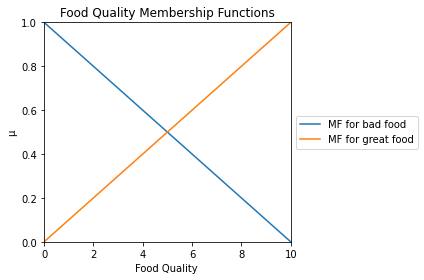

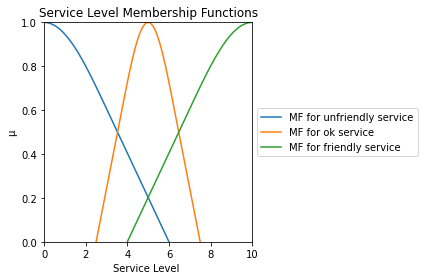

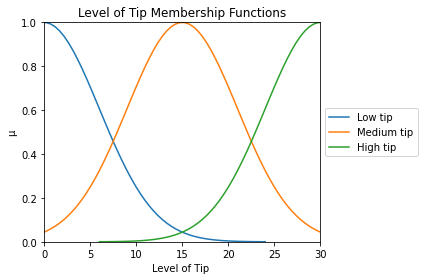

In [ ]:
from juzzyPython.generic.Plot import Plot

def plotMFs(name,sets, xAxisRange, discretizationLevel):
    """Plot the lines for each membership function of the sets"""
    plot.figure()
    plot.title(name)
    for i in range(len(sets)):
        plot.plotMF(name.replace("Membership Functions",""),sets[i].getName(),sets[i],discretizationLevel,xAxisRange,Tuple(0.0,1.0),False)
        plot.legend()
        
plot = Plot()

plotMFs("Food Quality Membership Functions",[badFoodMF, greatFoodMF], food.getDomain(), 100)
plotMFs("Service Level Membership Functions", [unfriendlyServiceMF, okServiceMF, friendlyServiceMF], service.getDomain(), 100)
plotMFs("Level of Tip Membership Functions", [lowTipMF, mediumTipMF, highTipMF], tip.getDomain(), 100)

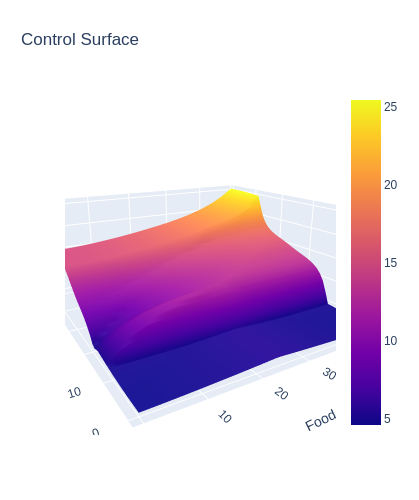

In [ ]:
import math
#%matplotlib notebook
import plotly.graph_objects as go

def getControlSurfaceData(useCentroidDefuzz,input1Discs,input2Discs):
        """Get the data to plot the control surface"""
        incrX = food.getDomain().getSize()/(input1Discs-1.0)
        incrY = service.getDomain().getSize()/(input2Discs-1.0)
        x, y, z = [], [], [ [0]*input1Discs for i in range(input2Discs)]

        for i in range(input1Discs):
            x.append(i*incrX)
        for i in range(input2Discs):
            y.append(i*incrY)
        
        for x_ in range(input1Discs):
            food.setInput(x[x_])
            for y_ in range(input2Discs):
                service.setInput(y[y_])
                if useCentroidDefuzz:
                    out = rulebase.evaluate(1).get(tip)
                else:
                    out = rulebase.evaluate(0).get(tip)
                if out == None or math.isnan(out):
                    z[y_][x_] = 0.0
                else:
                    z[y_][x_] = out
        
        fig = go.Figure(data=[go.Surface(z=z)])
        fig.update_layout(title='Control Surface', autosize=False, scene = dict(
                    xaxis_title=food.getName(), yaxis_title=service.getName(), zaxis_title=tip.getName()),
                    width=700, height=500, margin=dict(l=65, r=50, b=65, t=90))
        fig.show()
        
#Plot control surface, false for height defuzzification, true for centroid defuzz
getControlSurfaceData(True,50,50)